<a href="https://colab.research.google.com/github/Ghaby-X/VP16-inhibitors-pred/blob/main/FinalYearProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PREPARATION 1**

**Goal** : To prepare a dataset consisting of molecular descriptors and their encoded activity score

**Steps**
1. Importing the raw datafile and extracting the relevant columns
2. Importing libraries for computing molecular descriptors and computing the molecular descriptors
3. Organizing and exporting final dataset

In [ ]:
#Importing libraries for DATA PREPARARION 1

import pandas as pd
import os
import numpy as np

url = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/AID_651615_datatable_all.csv"

In [ ]:
data = pd.read_csv(url)
data

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Average Inhibition at 3.6 uM,Standard Deviation,Inhibition at 3.6 uM [1],Inhibition at 3.6 uM [2],Inhibition at 3.6 uM [3]
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Average percent inhibition of the counterscree...,Standard deviation derived from the normalized...,Percent inhibition of the counterscreen at a c...,Percent inhibition of the counterscreen at a c...,Percent inhibition of the counterscreen at a c...
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PERCENT,NONE,PERCENT,PERCENT,PERCENT
3,RESULT_ATTR_CONC_MICROMOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,NaN,3.6,3.6,3.6
4,1,121283339.0,72810.0,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,Active,100.0,NaN,NaN,99.56,0.416849,99.9965,98.9986,99.6849
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,2338,864460.0,665706.0,C1CC2=C(C1)NN=C2C3=NN=C4N3N=C(CS4)C5=CC=CC=C5,Inactive,0.0,NaN,NaN,-146.66,11.5239,-158.023,-130.86,-151.09
2342,2339,81066782.0,25015463.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,Inactive,0.0,NaN,NaN,-158.92,29.7203,-119.57,-191.385,-165.814
2343,2340,865952.0,667208.0,CC1=CC2=C(C3=C(CCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,Inactive,0.0,NaN,NaN,-163.09,17.2188,-156.295,-186.733,-146.229
2344,2341,81066784.0,42628533.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,Inactive,0.0,NaN,NaN,-165.53,20.589,-188.717,-138.684,-169.187


In [ ]:
data = data.drop([0,1,2,3]).reset_index(drop = True)
data

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Average Inhibition at 3.6 uM,Standard Deviation,Inhibition at 3.6 uM [1],Inhibition at 3.6 uM [2],Inhibition at 3.6 uM [3]
0,1,121283339.0,72810.0,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,Active,100.0,NaN,NaN,99.56,0.416849,99.9965,98.9986,99.6849
1,2,56463219.0,23618032.0,CN(C)C1=NC=NC2=C1N=CN2[C@H]3[C@@H]([C@@H]([C@H...,Active,99.0,NaN,NaN,99.42,0.217948,99.1519,99.409,99.6856
2,3,92763436.0,99927.0,CC1C(C(CC(O1)OC2CC(OC(C2O)C)OC3=CC4=CC5=C(C(=O...,Active,99.0,NaN,NaN,99.36,0.274316,99.4372,99.653,98.994
3,4,14730721.0,254021.0,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,Active,99.0,NaN,NaN,99.12,0.548498,99.6439,99.3477,98.3609
4,5,92763446.0,45280821.0,CCC(C)C1C(CC(=O)O[C@H](C(=O)[C@H](C(=O)NC(C(=O...,Active,99.0,NaN,NaN,99.01,0.185052,99.1478,99.1414,98.7521
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,2338,864460.0,665706.0,C1CC2=C(C1)NN=C2C3=NN=C4N3N=C(CS4)C5=CC=CC=C5,Inactive,0.0,NaN,NaN,-146.66,11.5239,-158.023,-130.86,-151.09
2338,2339,81066782.0,25015463.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,Inactive,0.0,NaN,NaN,-158.92,29.7203,-119.57,-191.385,-165.814
2339,2340,865952.0,667208.0,CC1=CC2=C(C3=C(CCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,Inactive,0.0,NaN,NaN,-163.09,17.2188,-156.295,-186.733,-146.229
2340,2341,81066784.0,42628533.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,Inactive,0.0,NaN,NaN,-165.53,20.589,-188.717,-138.684,-169.187


**Exctracting needed columns**

This step involves forming a relevant dataset out of the general dataset.








In [ ]:
#extracting columns 
cols_ml = ["PUBCHEM_CID", "PUBCHEM_EXT_DATASOURCE_SMILES", "PUBCHEM_ACTIVITY_SCORE", "PUBCHEM_ACTIVITY_OUTCOME"]
data1 = data[cols_ml]
data1.columns = ["PUBCHEM_CID", "Canonical_smiles", "Activity_score", "Activity_outcome"]
data1

,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,72810.0,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,100.0,Active
1,23618032.0,CN(C)C1=NC=NC2=C1N=CN2[C@H]3[C@@H]([C@@H]([C@H...,99.0,Active
2,99927.0,CC1C(C(CC(O1)OC2CC(OC(C2O)C)OC3=CC4=CC5=C(C(=O...,99.0,Active
3,254021.0,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,99.0,Active
4,45280821.0,CCC(C)C1C(CC(=O)O[C@H](C(=O)[C@H](C(=O)NC(C(=O...,99.0,Active
...,...,...,...,...
2337,665706.0,C1CC2=C(C1)NN=C2C3=NN=C4N3N=C(CS4)C5=CC=CC=C5,0.0,Inactive
2338,25015463.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,Inactive
2339,667208.0,CC1=CC2=C(C3=C(CCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0.0,Inactive
2340,42628533.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,Inactive


In [ ]:
data1["Activity_outcome"] = data1["Activity_outcome"].apply(lambda x: 1 if x == "Active" else 0)
data1

<ipython-input-5-bec597b8dd38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Activity_outcome"] = data1["Activity_outcome"].apply(lambda x: 1 if x == "Active" else 0)


,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,72810.0,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,100.0,1
1,23618032.0,CN(C)C1=NC=NC2=C1N=CN2[C@H]3[C@@H]([C@@H]([C@H...,99.0,1
2,99927.0,CC1C(C(CC(O1)OC2CC(OC(C2O)C)OC3=CC4=CC5=C(C(=O...,99.0,1
3,254021.0,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,99.0,1
4,45280821.0,CCC(C)C1C(CC(=O)O[C@H](C(=O)[C@H](C(=O)NC(C(=O...,99.0,1
...,...,...,...,...
2337,665706.0,C1CC2=C(C1)NN=C2C3=NN=C4N3N=C(CS4)C5=CC=CC=C5,0.0,0
2338,25015463.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0
2339,667208.0,CC1=CC2=C(C3=C(CCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0.0,0
2340,42628533.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0


In [ ]:
data1.isnull().sum()


PUBCHEM_CID         1
Canonical_smiles    1
Activity_score      0
Activity_outcome    0
dtype: int64

In [ ]:
data1.dropna(axis=0, inplace=True)
data1.isnull().sum()

<ipython-input-7-d2ac264bdd48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(axis=0, inplace=True)


PUBCHEM_CID         0
Canonical_smiles    0
Activity_score      0
Activity_outcome    0
dtype: int64

In [ ]:
data1[data1.duplicated(["Canonical_smiles", "Activity_outcome"])] #checks for duplicates based on the canonical smiles entry

,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
363,5287620.0,C[C@H]1CCC/C=C/[C@@H]2C[C@@H](C[C@H]2[C@@H](/C...,78.0,1
485,16196147.0,COC1=CC=CC=C1N2C3=[N+](C=C2C4=CC=CC=C4)C5=CC=C...,71.0,1
700,2873568.0,CC1=CC=C(C=C1)C2=CN(C3=[N+]2CCCS3)C4=CC=CC=C4....,56.0,1


In [ ]:
data1.drop_duplicates(subset = "Canonical_smiles", inplace=True) #drops duplicated canonical smiles
data1

<ipython-input-9-17ea7323fb84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop_duplicates(subset = "Canonical_smiles", inplace=True) #drops duplicated canonical smiles


,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,72810.0,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,100.0,1
1,23618032.0,CN(C)C1=NC=NC2=C1N=CN2[C@H]3[C@@H]([C@@H]([C@H...,99.0,1
2,99927.0,CC1C(C(CC(O1)OC2CC(OC(C2O)C)OC3=CC4=CC5=C(C(=O...,99.0,1
3,254021.0,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,99.0,1
4,45280821.0,CCC(C)C1C(CC(=O)O[C@H](C(=O)[C@H](C(=O)NC(C(=O...,99.0,1
...,...,...,...,...
2337,665706.0,C1CC2=C(C1)NN=C2C3=NN=C4N3N=C(CS4)C5=CC=CC=C5,0.0,0
2338,25015463.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0
2339,667208.0,CC1=CC2=C(C3=C(CCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0.0,0
2340,42628533.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0


In [ ]:
# data1.to_csv("Assayresults_preprocessed.csv")
# from google.colab import files
# files.download("Assayresults_preprocessed.csv")

In [ ]:
data1[data1.Activity_outcome == 1].count()

PUBCHEM_CID         986
Canonical_smiles    986
Activity_score      986
Activity_outcome    986
dtype: int64

# Data Exploration and Drug likeness

In [ ]:
!pip install rdkit

In [ ]:
from rdkit.Chem import PandasTools, Descriptors, Lipinski

In [ ]:
smiles_list = data1['Canonical_SMILES'].to_list()  # convert the Canonical Smiles columns to a list
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list] # generates the 2D structures of molecular smiles

In [ ]:
def lipinski(moldata, verbose=False):
 
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(mols)
df_lipinski

# Molecular Descriptors

In [1]:
!pip install rdkit
!pip install mordred

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 47.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.2 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176723 sha256=1086a610432251267e137c12f1f0dc69472085a1d126e29f3e51a49e1d35a7fd
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from mordred import Calculator, descriptors
from rdkit.Chem import MACCSkeys
from rdkit.Chem import PandasTools, Descriptors, Lipinski
from rdkit import DataStructs

In [ ]:
smiles_list = data1['Canonical_SMILES'].to_list()  # convert the Canonical Smiles columns to a list
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list] # generates the 2D structures of molecular smiles

In [3]:

#Function to calculate mordred descriptors
def mordred_desc(data):  #receives canonical smiles in a list datastructure
  # create descriptor calculator with all descriptors
  calc = Calculator(descriptors, ignore_3D=True)  
  return calc.pandas(data)

#function to calculate Morgan fps
def morgan_fps(data):
  fps = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=124) for mol in data]  # Calculate Morgan fingerprints for each molecule
  fp_array = [np.array(fp) for fp in fps]   # Convert fingerprints to numpy array
  column_names = ['morgan_' + str(i) for i in range(len(fp_array[0]))]
  return pd.DataFrame(fp_array, columns = column_names)

#function to create MACCS keys
def maccs_fps(mols):
    maccs_keys = [MACCSkeys.GenMACCSKeys(m) for m in mols]
    fp_array = [np.array(fp) for fp in maccs_keys]
    column_names = ['maccs_' + str(i) for i in range(len(fp_array[0]))]
    return pd.DataFrame(fp_array, columns = column_names)



In [ ]:
# #convert the fingerprints dataframe to csv
# df_morganfps.to_csv("df_morganfps.csv", index = False)
# df_maccsfps.to_csv("df_maccsfps.csv", index = False)

# #import files from google colab and downloads the csv files
# from google.colab import files
# files.download('df_morganfps.csv')
# files.download('df_maccsfps.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modelling with Maccs & Morgan2 Fingerprints

In [4]:
import pandas as pd
import os
import numpy as np

In [5]:
url = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/Assayresults_preprocessed.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,0,72810.0,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,100.0,1
1,1,23618032.0,CN(C)C1=NC=NC2=C1N=CN2[C@H]3[C@@H]([C@@H]([C@H...,99.0,1
2,2,99927.0,CC1C(C(CC(O1)OC2CC(OC(C2O)C)OC3=CC4=CC5=C(C(=O...,99.0,1
3,3,254021.0,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,99.0,1
4,4,45280821.0,CCC(C)C1C(CC(=O)O[C@H](C(=O)[C@H](C(=O)NC(C(=O...,99.0,1
...,...,...,...,...,...
2333,2337,665706.0,C1CC2=C(C1)NN=C2C3=NN=C4N3N=C(CS4)C5=CC=CC=C5,0.0,0
2334,2338,25015463.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0
2335,2339,667208.0,CC1=CC2=C(C3=C(CCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0.0,0
2336,2340,42628533.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0


In [6]:
smiles_list = df['Canonical_smiles'].to_list()  # convert the Canonical Smiles columns to a list
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list] # generates the 2D structures of molecular smiles

In [7]:
df_maccsfps = maccs_fps(mols)
df_morganfps = morgan_fps(mols)

In [8]:
df1 = df_morganfps.join(df_maccsfps)
df1

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,1,1,1,0
1,0,0,0,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,1,1,1,0,1,0,1,1,1,...,1,0,1,1,0,1,1,1,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
2334,0,0,0,1,1,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,0
2335,0,1,1,0,0,1,0,0,1,1,...,1,0,1,1,0,1,1,1,1,0
2336,0,0,0,1,0,1,0,1,0,1,...,1,1,1,1,1,1,1,1,1,0


In [9]:
df1.isnull().sum()[df1.isnull().sum() != 0]

Series([], dtype: int64)

In [10]:
X = df1
X

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,1,1,1,0
1,0,0,0,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,1,1,1,0,1,0,1,1,1,...,1,0,1,1,0,1,1,1,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
2334,0,0,0,1,1,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,0
2335,0,1,1,0,0,1,0,0,1,1,...,1,0,1,1,0,1,1,1,1,0
2336,0,0,0,1,0,1,0,1,0,1,...,1,1,1,1,1,1,1,1,1,0


In [11]:
y = df["Activity_outcome"]
y

0       1
1       1
2       1
3       1
4       1
       ..
2333    0
2334    0
2335    0
2336    0
2337    0
Name: Activity_outcome, Length: 2338, dtype: int64

In [12]:
#Splitting our data into train and test data using train_test_split module

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [13]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


# Define and train the model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)


# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8048433048433048


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [5, 50, 100, 200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, n_jobs=5)
CV_rfc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 50, 100, 200, 700]})

In [28]:
CV_rfc.best_params_

{'max_features': 'auto', 'n_estimators': 700}

In [30]:
new_rfc = RandomForestClassifier(n_estimators = 700, max_features = "auto")
new_rfc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [31]:
evaluate(X_test, y_test, new_rfc)

accuracy             0.816239
sensitivity          0.731148
specificity          0.881612
precision            0.825926
F1                   0.775652
balanced_accuracy    0.806380
MCC                  0.624326
auc_roc              0.906685
dtype: float64

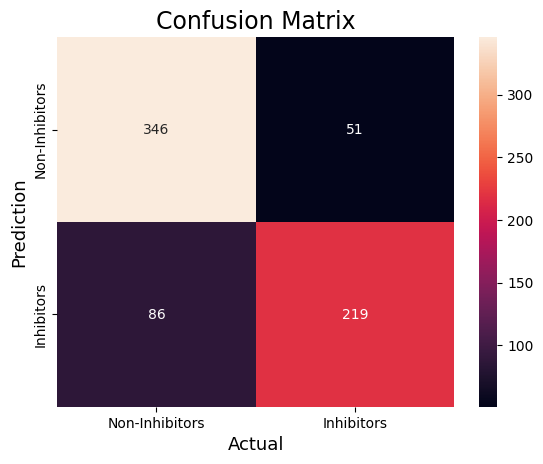

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Non-Inhibitors','Inhibitors'],
            yticklabels=['Non-Inhibitors','Inhibitors'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [16]:
evaluate(X_test, y_test, rfc)

accuracy             0.804843
sensitivity          0.718033
specificity          0.871537
precision            0.811111
F1                   0.761739
balanced_accuracy    0.794785
MCC                  0.600698
auc_roc              0.899013
dtype: float64

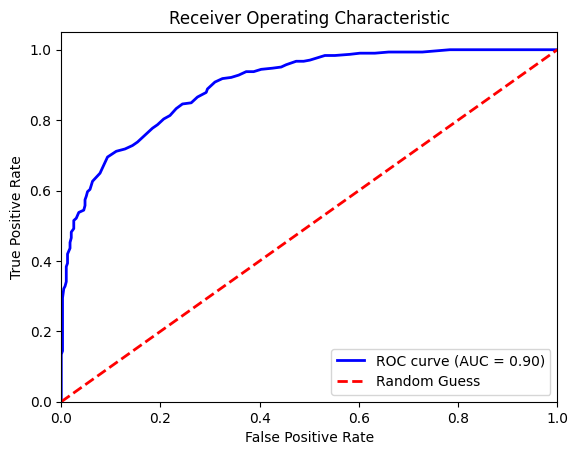

In [19]:
plot_roc(X_test, y_test, rfc)

In [18]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


def evaluate(X_test, y_test, model):
    y_pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]

    TP = sum((y_pred == 1) & (y_test == 1))
    TN = sum((y_pred == 0) & (y_test == 0))
    FP = sum((y_pred == 1) & (y_test == 0))
    FN = sum((y_pred == 0) & (y_test == 1))

    accuracy = (TP + TN) / (TP+TN+FN+FP)
    sensitivity = (TP) / (TP+FN)
    specificity = (TN) / (TN + FP)
    precision = (TP) / (TP + FP)
    F1 = 2 * ((precision * sensitivity) / (precision + sensitivity))
    balanced_accuracy = (sensitivity + specificity) / 2
    #mcc = ((TP * TN) - (FP * FN)) / np.sqrt((TP+TN)*(TP+FN)*(TN+FP)*(TN+FN))
    mcc = matthews_corrcoef(y_test, y_pred)
    AUCROC = roc_auc_score(y_test, pred_proba)

    values = [accuracy, sensitivity, specificity, precision, F1, balanced_accuracy, mcc, AUCROC]
    index = ["accuracy", "sensitivity", "specificity", "precision", "F1", "balanced_accuracy","MCC", "auc_roc"]
    return pd.Series(values, index = index)

def plot_roc(X_test, y_test, model):
    y_pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

    # Calculate the AUC
    roc_auc = roc_auc_score(y_test, pred_proba)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Applicability domain

In [ ]:
!pwd

/content


In [ ]:
!pip install importlib requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for importlib: filename=importlib-1.0.4-py3-none-any.whl size=5851 sha256=690e888371f618dd3079a45c3fd4f46e482cea9abab21480a6a8009715fb31cb
  Stored in directory: /root/.cache/pip/wheels/0f/77/67/b2657372b2523148d81dcdd875916a417f047849169567cb2e
Successfully built importlib


In [ ]:
import importlib
import requests

In [ ]:
def import_ad_analysis_class():
    url = 'https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/AD_analysis.py'
    response = requests.get(url)   # sends an HTTP request to get python file from link provided
    module = compile(response.text, 'AD_analysis.py', 'exec')  #converts the text context of the python script into a code object (an executable format)
    namespace = {}  # An empty namespace is created using {} to serve as the global environment for executing the compiled code
    exec(module, namespace) # The exec() function is used to execute the compiled code within the created namespace. This step essentially runs the code from the retrieved script, defining classes, functions, and other objects within the namespace.
    return namespace['AD_analysis']     # Finally, the function returns the AD_analysis class from the namespace. This allows the AD_analysis class to be accessed and used in the calling code.

In [ ]:
AD_analysis = import_ad_analysis_class()

In [ ]:
AD_analysis = AD_analysis(X_train)

In [ ]:
AD_analysis.visualize_AD()

LinAlgError: ignored

# **GENERAL PIPELINE**

**Goal** : To create a standalone pipeline that preprocess Raw data

In [ ]:
#Dropping columns with too many missing values
max_missing_values = 100  # maximum number of missing values allowed in a column

# Get columns with too many missing values
cols_with_missing_values = X_train.columns[X_train.isna().sum() > max_missing_values]

cols_with_missing_values

X_train.drop(cols_with_missing_values, axis = 1, inplace = True)
X_train

<ipython-input-305-eb641cdb2893>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(cols_with_missing_values, axis = 1, inplace = True)


,Xc-5dv,TopoPSA(NO),ATSC1i,SlogP_VSA1,PEOE_VSA8,ATSC0d,IC5,VSA_EState2,Xc-5d,SdsCH,...,NsssSiH,AATS4pe,SsssSiH,SlogP_VSA7,AATSC5dv,NaaaC,MATS5c,n6AHRing,MATS5m,ATSC2m
0,0.801531,-0.196299,0.003400,0.124967,1.214920,0.214398,-0.698008,1.271220,0.353205,0.928016,...,0.0,-0.725222,0.0,-0.386081,0.119311,-0.661113,1.020790,-0.701136,-1.154128,1.091741
1,0.665813,0.729399,1.930606,0.984308,-1.419528,0.124912,-1.246874,1.568156,0.659485,-0.366719,...,0.0,-0.558440,0.0,-0.386081,1.399888,1.103265,-0.368716,-0.701136,0.480945,0.624578
2,-0.693228,-0.088473,-0.449688,0.747792,-0.955105,-0.259925,-0.157773,-0.771159,-0.565908,-0.366719,...,0.0,0.184304,0.0,-0.386081,-2.764990,2.867643,-0.852546,-0.701136,-2.053362,0.345624
3,-0.445655,-0.124522,0.260475,-0.018859,-1.432903,-0.681228,-0.089480,-1.170106,-0.521604,-0.366719,...,0.0,0.672560,0.0,-0.386081,1.111858,-0.661113,-0.949394,-0.701136,1.170750,-0.423976
4,-0.212061,-0.627927,-0.642287,0.090100,0.865239,0.125814,0.016631,0.992146,-0.408594,-0.366719,...,0.0,-0.756352,0.0,1.766637,-0.500937,-0.661113,0.554393,0.962442,0.012880,-0.374926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,-0.843306,1.100515,0.676377,0.831183,-0.170071,-0.138266,0.775835,0.519222,-0.885427,-0.366719,...,0.0,0.882588,0.0,1.766637,1.739204,-0.661113,1.673809,-0.701136,0.799180,0.189388
1664,-0.615823,-0.654964,0.677849,-1.379011,0.384358,-1.142206,-0.905755,-0.814037,-0.840389,-0.366719,...,0.0,-0.592009,0.0,-0.386081,1.124030,-0.661113,1.234292,-0.701136,1.239404,-1.321601
1665,-0.241260,0.062162,-1.154126,1.428930,-0.561778,0.823118,0.777278,-0.210418,0.839942,0.000787,...,0.0,1.596326,0.0,-0.386081,-1.210464,0.221076,-0.201050,-0.701136,-0.793366,0.635450
1666,0.245767,-0.242327,0.281877,0.066655,-1.384636,-0.295819,-1.304049,0.415084,-0.312736,-0.366719,...,0.0,-1.106512,0.0,-0.386081,1.333504,-0.661113,0.314748,-0.701136,0.318034,-0.185555


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

# def transform_dtype(data):
#   X_transformed = data.applymap(convert_to_float_or_not_available(x))
#   return X_transformed

#function to convert every string entry into float. Either np.nan or its value
def convert_to_float_or_not_available(x):
    if isinstance(x, str):
        try:
            return float(x)
        except ValueError:
            return np.nan
    else:
        return x


#function to transform data type using the "convert_to_float_or_not_available" function
def transform_dtype(data):
    X_transformed = np.vectorize(convert_to_float_or_not_available)(data)
    return X_transformed.astype(float)

# #function to generate mi_cols
# class relevantCols(BaseEstiamtor, TransformerMixin):
#   def __init__(self, X, y = None):
    
  
#   def fit(self, X, y= None):
#     mutual_info = mutual_info_classif(X_train_imputed, y_train)
#     mi_scores = pd.Series(mutual_info)
#     mi_scores.index = X_train_imputed.columns
#     mi_scores_sorted = mi_scores.sort_values(ascending = False)
#     mi_scores_sorted = mi_scores_sorted[mi_scores_sorted != 0]
#     mi_cols = mi_scores_sorted.index




column_selector = ColumnTransformer(
                          transformers=[
                              ("relevant_cols", "passthrough", mi_cols)
])





In [ ]:
# Define the pipeline
my_pipeline = Pipeline([
    ("Column selection", column_selector),
    ("dtype_transformer", FunctionTransformer(transform_dtype)),
    ("imputer", SimpleImputer(strategy = 'mean')),
    ("scaler", StandardScaler())
])
    
my_pipeline_unscaled = Pipeline([
    ("Column selection", column_selector),
    ("dtype_transformer", FunctionTransformer(transform_dtype)),
    ("imputer", SimpleImputer(strategy = 'mean'))
])

my_pipeline_unscaled.fit(X_train)
my_pipeline.fit(X_train)

Pipeline(steps=[('Column selection',
                 ColumnTransformer(transformers=[('relevant_cols',
                                                  'passthrough',
                                                  Index(['Xc-5dv', 'TopoPSA(NO)', 'ATSC1i', 'SlogP_VSA1', 'PEOE_VSA8', 'ATSC0d',
       'IC5', 'VSA_EState2', 'Xc-5d', 'SdsCH',
       ...
       'NsssSiH', 'AATS4pe', 'SsssSiH', 'SlogP_VSA7', 'AATSC5dv', 'NaaaC',
       'MATS5c', 'n6AHRing', 'MATS5m', 'ATSC2m'],
      dtype='object', length=889))])),
                ('dtype_transformer',
                 FunctionTransformer(func=<function transform_dtype at 0x7f6b2358a200>)),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler())])

# **PIPELINE FOR TEST DATA**

**Goal**: to create a pipeline that preprocess our testing data for model evaluation

In [ ]:
# # The pipeline should involve

# 1. Selecting the relevant columns from test_data. Relevant cols is stored in "mi_cols"
# 2. Scaling the data
# 3. Converting all dtypes to "float", "int" or "bool"
# 4. Imputing missing values with the mean of the test data

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

# def transform_dtype(data):
#   X_transformed = data.applymap(convert_to_float_or_not_available(x))
#   return X_transformed

def transform_dtype(data):
    X_transformed = np.vectorize(convert_to_float_or_not_available)(data)
    return X_transformed.astype(float)


Column_selector = ColumnTransformer(
    transformers=[
        ("relevant_cols", "passthrough", mi_cols)
    ]
)

# Define the pipeline
my_pipeline = Pipeline([
    ("preprocessor", Column_selector),
    ("dtype_transformer", FunctionTransformer(transform_dtype)),
    ("imputer", imputer),
    ("scaler", scaler)
])

# my_pipeline_unscaled = Pipeline([
#     ("preprocessor", Column_selector),
#     ("dtype_transformer", FunctionTransformer(transform_dtype)),
#     ("imputer", imputer)
#])

In [ ]:
test_data_scaled = pd.DataFrame(my_pipeline.fit_transform(X_test), columns = mi_cols)
#test_data_unscaled = pd.DataFrame(my_pipeline_unscaled.fit_transform(X_test), columns = mi_cols)

# **MODEL BUILDING**

## Random Forest model

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


# Define and train the model
rfc = RandomForestClassifier()
rfc.fit(X_resampled, y_resampled)
#rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(test_data_scaled)
#y_pred = rfc.predict(X_test)


# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8359659781287971


### Grid Search and crossvalidation

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

params = {
    "max_depth": [2,3,5,10,20],
    "min_samples": [5,10,20,50,100,200],
    "n_estimators": [10, 25,30,50,100,200]
}

In [ ]:
clf = GridSearchCV(rfc, params, cv = 3)

### **Confusion matrix for RandomForest Model**

*   List item
*   List item



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

NameError: ignored

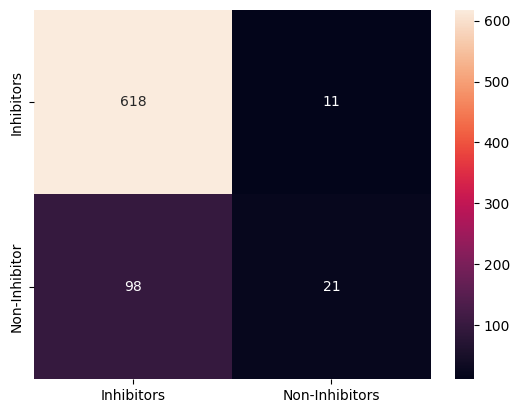

In [ ]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Inhibitors','Non-Inhibitors'],
            yticklabels=['Inhibitors','Non-Inhibitor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Support Vector Model

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
 
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix
 
 
# Building a Support Vector Machine on train data
svc_model = SVC()
svc_model.fit(X_resampled, y_resampled)
 
y_pred = svc_model .predict(test_data_scaled)
# check the accuracy on the training set

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8493317132442284


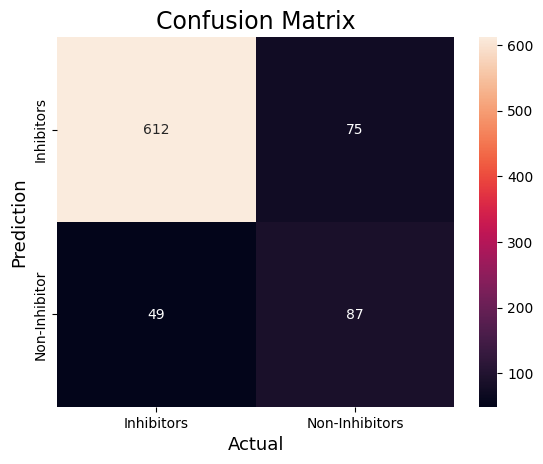

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Inhibitors','Non-Inhibitors'],
            yticklabels=['Inhibitors','Non-Inhibitor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# **PROCESSING VALIDATING DATA**

## Acquriring validating data

In [ ]:
#the path contains the link where the data to be processed is located
path3 = "/content/drive/MyDrive/Colab Notebooks/FinalYearProject/VP16_bioactivity_preprocessed.csv"

valdata = pd.read_csv(path3)
colname = ["canonical_smiles", "bioactivity_class"]
valdata = valdata[colname]
valdata


,canonical_smiles,bioactivity_class
0,O=c1ccc2c(ccc3ncccc32)o1,inactive
1,CC(=O)NC(c1cc(Cl)c2cccnc2c1O)C(C)C,intermediate
2,COc1ccc(Nc2ncnc3ccc(Br)cc23)c(OC)c1,inactive
3,Cc1cc(/C=C2\Cc3ccccc3C2=O)c(C)n1-c1ccccc1,inactive
4,Cc1nc2c(-c3ccc(F)cc3)cnn2c(N)c1-c1ccccc1,inactive
...,...,...
930,COc1ccc(N2CCN(c3[nH]cnc4c5ccccc5nc3-4)CC2)cc1,inactive
931,CCc1ccc(CN(C)C(=O)c2cc(COc3cccc4cnccc34)on2)cc1,inactive
932,CC(C)(C)c1ccc(-c2nnc3sc(-c4ccccn4)nn23)cc1,inactive
933,c1ccc(C(Cc2nc(-c3ccncc3)no2)c2ccccc2)cc1,inactive


In [ ]:
valdata.describe()

,canonical_smiles,bioactivity_class
count,935,935
unique,929,3
top,O=C(OC(c1ccccc1)c1nccc2ccccc12)c1ccccc1,inactive
freq,2,717


In [ ]:
valdata[valdata["bioactivity_class"] == "intermediate"].count()

canonical_smiles     204
bioactivity_class    204
dtype: int64

In [ ]:
valdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   canonical_smiles   935 non-null    object
 1   bioactivity_class  935 non-null    object
dtypes: object(2)
memory usage: 14.7+ KB


In [ ]:
valdata.drop_duplicates(inplace = True, ignore_index = True)
valdata

,canonical_smiles,bioactivity_class
0,O=c1ccc2c(ccc3ncccc32)o1,inactive
1,CC(=O)NC(c1cc(Cl)c2cccnc2c1O)C(C)C,intermediate
2,COc1ccc(Nc2ncnc3ccc(Br)cc23)c(OC)c1,inactive
3,Cc1cc(/C=C2\Cc3ccccc3C2=O)c(C)n1-c1ccccc1,inactive
4,Cc1nc2c(-c3ccc(F)cc3)cnn2c(N)c1-c1ccccc1,inactive
...,...,...
930,COc1ccc(N2CCN(c3[nH]cnc4c5ccccc5nc3-4)CC2)cc1,inactive
931,CCc1ccc(CN(C)C(=O)c2cc(COc3cccc4cnccc34)on2)cc1,inactive
932,CC(C)(C)c1ccc(-c2nnc3sc(-c4ccccn4)nn23)cc1,inactive
933,c1ccc(C(Cc2nc(-c3ccncc3)no2)c2ccccc2)cc1,inactive


In [ ]:
#Removing all the intermediate
#valdata[valdata.bioactivity_class == "intermediate"]
valdata.drop(valdata[valdata.bioactivity_class == "intermediate"].index, axis = 0, inplace = True)
valdata

,canonical_smiles,bioactivity_class
0,O=c1ccc2c(ccc3ncccc32)o1,inactive
2,COc1ccc(Nc2ncnc3ccc(Br)cc23)c(OC)c1,inactive
3,Cc1cc(/C=C2\Cc3ccccc3C2=O)c(C)n1-c1ccccc1,inactive
4,Cc1nc2c(-c3ccc(F)cc3)cnn2c(N)c1-c1ccccc1,inactive
5,COc1ccc2nc(O)c(CN(CCN3CCCC3)C(=O)Nc3ccccc3Cl)c...,inactive
...,...,...
930,COc1ccc(N2CCN(c3[nH]cnc4c5ccccc5nc3-4)CC2)cc1,inactive
931,CCc1ccc(CN(C)C(=O)c2cc(COc3cccc4cnccc34)on2)cc1,inactive
932,CC(C)(C)c1ccc(-c2nnc3sc(-c4ccccn4)nn23)cc1,inactive
933,c1ccc(C(Cc2nc(-c3ccncc3)no2)c2ccccc2)cc1,inactive


In [ ]:
valdata.reset_index(inplace = True, drop = False)
valdata.drop(["index"], axis = 1, inplace = True)

## Encoding validation data

In [ ]:
#Encoding the activity data into 1s and 0s using LabelBinarizer from sklearn.preprocessing module
from sklearn.preprocessing import LabelBinarizer

lb_val = LabelBinarizer()
valdata["encoded"] = lb_val.fit_transform(valdata["bioactivity_class"])
valdata

swap_dict = {0: "Inactive", 1: "Active"}
valdata["encoded"]= valdata["encoded"].replace(swap_dict)
#encoded[encoded == 0] = "Inactive"
#encoded[encoded == 1] = "Active"

# Transform back to binary
valdata["encoded"] = lb.fit_transform(valdata["encoded"])
valdata

,canonical_smiles,bioactivity_class,encoded
0,O=c1ccc2c(ccc3ncccc32)o1,inactive,0
1,COc1ccc(Nc2ncnc3ccc(Br)cc23)c(OC)c1,inactive,0
2,Cc1cc(/C=C2\Cc3ccccc3C2=O)c(C)n1-c1ccccc1,inactive,0
3,Cc1nc2c(-c3ccc(F)cc3)cnn2c(N)c1-c1ccccc1,inactive,0
4,COc1ccc2nc(O)c(CN(CCN3CCCC3)C(=O)Nc3ccccc3Cl)c...,inactive,0
...,...,...,...
726,COc1ccc(N2CCN(c3[nH]cnc4c5ccccc5nc3-4)CC2)cc1,inactive,0
727,CCc1ccc(CN(C)C(=O)c2cc(COc3cccc4cnccc34)on2)cc1,inactive,0
728,CC(C)(C)c1ccc(-c2nnc3sc(-c4ccccn4)nn23)cc1,inactive,0
729,c1ccc(C(Cc2nc(-c3ccncc3)no2)c2ccccc2)cc1,inactive,0


In [ ]:
cols = ["canonical_smiles", "encoded"]
valdata = valdata[cols]
valdata

,canonical_smiles,encoded
0,O=c1ccc2c(ccc3ncccc32)o1,0
1,COc1ccc(Nc2ncnc3ccc(Br)cc23)c(OC)c1,0
2,Cc1cc(/C=C2\Cc3ccccc3C2=O)c(C)n1-c1ccccc1,0
3,Cc1nc2c(-c3ccc(F)cc3)cnn2c(N)c1-c1ccccc1,0
4,COc1ccc2nc(O)c(CN(CCN3CCCC3)C(=O)Nc3ccccc3Cl)c...,0
...,...,...
726,COc1ccc(N2CCN(c3[nH]cnc4c5ccccc5nc3-4)CC2)cc1,0
727,CCc1ccc(CN(C)C(=O)c2cc(COc3cccc4cnccc34)on2)cc1,0
728,CC(C)(C)c1ccc(-c2nnc3sc(-c4ccccn4)nn23)cc1,0
729,c1ccc(C(Cc2nc(-c3ccncc3)no2)c2ccccc2)cc1,0


## Computing Molecular descriptors

In [ ]:
# !pip install rdkit
# !pip install mordred

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached rdkit-2022.9.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (29.4 MB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 KB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.8 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176723 sha256=687822fdc0fdd70576dd88b0f9a59c1a612b501fa5634af5bc9571677c0cc566
  Stored in directory: /root/.cache/pip/wheels/05/95/d1/9e913738f0e8362b3676917b953a60afd76d2b0b99ff8a71ec
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [ ]:
# # calculate multiple molecule
# from rdkit import Chem
# from mordred import Calculator, descriptors

# # create descriptor calculator with all descriptors
# calc = Calculator(descriptors, ignore_3D=True)

# len(calc.descriptors)



# valsmiles_list = valdata['canonical_smiles'].to_list()
# mols = [Chem.MolFromSmiles(smi) for smi in valsmiles_list]

# # as pandas
# val_desc = calc.pandas(mols)
# val_desc


100%|██████████| 731/731 [04:12<00:00,  2.89it/s]


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.008885,9.506844,0,0,20.184699,2.447092,4.894183,20.184699,1.345647,3.672689,...,9.792277,47.729475,197.047678,8.956713,334,24,82.0,98.0,3.805556,3.250000
1,16.958632,13.563127,0,0,28.942317,2.418738,4.837477,28.942317,1.31556,4.021061,...,10.009603,56.160358,359.026939,9.972971,1057,35,114.0,134.0,6.777778,5.000000
2,19.136972,15.634076,0,0,31.672448,2.487651,4.788067,31.672448,1.319685,4.134711,...,10.186973,75.237519,313.146664,7.282481,1348,39,132.0,160.0,7.0,5.194444
3,19.136972,15.131287,0,0,31.610264,2.525126,4.9766,31.610264,1.317094,4.133221,...,10.255024,73.059872,318.128075,8.157130,1311,41,132.0,160.0,7.0,5.194444
4,24.915146,19.481666,0,1,41.800545,2.420972,4.841477,41.800545,1.306267,4.391966,...,10.283669,80.940601,454.177168,7.697918,3039,48,166.0,193.0,9.611111,7.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,21.677670,15.368412,0,0,37.138212,2.519523,4.92279,37.138212,1.375489,4.259045,...,10.350830,76.969103,359.174610,7.482804,1977,46,150.0,182.0,6.25,5.916667
727,23.391543,17.372108,0,0,39.754798,2.38767,4.761009,39.754798,1.32516,4.331119,...,10.214532,79.099382,401.173942,7.569320,2944,45,156.0,182.0,8.5,6.694444
728,19.345269,15.070372,0,0,31.108624,2.503107,4.861143,31.108624,1.296193,4.13785,...,10.207104,75.028768,335.120467,8.173670,1414,37,134.0,160.0,7.090278,5.027778
729,19.677670,15.401762,0,0,34.197322,2.393566,4.743168,34.197322,1.367893,4.158431,...,9.981235,73.098841,327.137162,7.788980,1549,35,130.0,151.0,5.416667,5.583333


In [ ]:
# # convert dataframe to csv
# val_desc.to_csv("val_desc.csv", index = False)

# # download csv file to local machine
# from google.colab import files
# files.download('val_desc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Preparing final Validation data

In [ ]:
path_val = "/content/gdrive/My Drive/Colab Notebooks/FinalYearProject/val_desc.csv"

X_val1 = pd.read_csv(path_val)
X_val1

<ipython-input-159-75902980c51a>:3: DtypeWarning: Columns (142,151,169,178,187,196,205,214,223,232,349,358,367,385,394,403,412,421,430,439,448,456,464,472,488,496,504,512,520,528,536,544,552,560,568,584,592,600,608,616,624,632,640,833,841,1366) have mixed types. Specify dtype option on import or set low_memory=False.
  X_val1 = pd.read_csv(path_val)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.008885,9.506844,0,0,20.18469913136549,2.447091645761096,4.894183291522189,20.18469913136549,1.3456466087576995,3.672688622347193,...,9.792277,47.729475,197.047678,8.956713,334,24,82.0,98.0,3.805555555555556,3.250000
1,16.958632,13.563127,0,0,28.94231650048852,2.4187383487985494,4.837476697597099,28.94231650048852,1.3155598409312963,4.021061399957617,...,10.009603,56.160358,359.026939,9.972971,1057,35,114.0,134.0,6.777777777777777,5.000000
2,19.136972,15.634076,0,0,31.672448000161648,2.4876510290978313,4.788066707039498,31.672448000161644,1.3196853333400684,4.134711470606273,...,10.186973,75.237519,313.146664,7.282481,1348,39,132.0,160.0,7.0,5.194444
3,19.136972,15.131287,0,0,31.610263780616307,2.525125807280525,4.976599773755189,31.610263780616307,1.317094324192346,4.133220864299109,...,10.255024,73.059872,318.128075,8.157130,1311,41,132.0,160.0,7.0,5.194444
4,24.915146,19.481666,0,1,41.80054469842458,2.4209717419754364,4.841477144505737,41.80054469842458,1.3062670218257681,4.391966335673945,...,10.283669,80.940601,454.177168,7.697918,3039,48,166.0,193.0,9.61111111111111,7.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,21.677670,15.368412,0,0,37.13821176319902,2.5195230311369694,4.922790010341589,37.13821176319902,1.3754893245629265,4.259044834373182,...,10.350830,76.969103,359.174610,7.482804,1977,46,150.0,182.0,6.25,5.916667
727,23.391543,17.372108,0,0,39.75479795569383,2.3876696126204857,4.761009353563616,39.75479795569383,1.325159931856461,4.3311191954895785,...,10.214532,79.099382,401.173942,7.569320,2944,45,156.0,182.0,8.5,6.694444
728,19.345269,15.070372,0,0,31.10862369117012,2.5031069877083403,4.861142787056886,31.10862369117012,1.296192653798755,4.137850387984663,...,10.207104,75.028768,335.120467,8.173670,1414,37,134.0,160.0,7.090277777777779,5.027778
729,19.677670,15.401762,0,0,34.19732194058993,2.393565825239764,4.743167510100344,34.19732194058993,1.3678928776235972,4.158431444047762,...,9.981235,73.098841,327.137162,7.788980,1549,35,130.0,151.0,5.416666666666667,5.583333


In [ ]:
y_val = valdata['encoded']
y_val

0      0
1      0
2      0
3      0
4      0
      ..
726    0
727    0
728    0
729    0
730    0
Name: encoded, Length: 731, dtype: int64

In [ ]:
X_val = pd.DataFrame(my_pipeline.transform(X_val1), columns = mi_cols)
X_val

,SlogP_VSA1,TopoPSA(NO),SMR_VSA3,EState_VSA8,PEOE_VSA8,Xc-5d,SMR_VSA6,SlogP_VSA3,PEOE_VSA11,EState_VSA1,...,MATS1d,ZMIC3,MATS2v,AATSC6c,RPCG,StsC,AATSC3i,NsBr,SsssssAs,AATS3m
0,-0.570316,-0.887785,-0.595194,-0.782139,-0.064486,-0.824197,-1.146207,-1.298470,-0.819277,-0.600196,...,-0.672391,-1.556423,-1.579941,-1.547216,5.171300,-0.158713,0.827183,-0.189207,0.0,0.487835
1,0.698975,-0.493290,0.090760,0.415726,-0.579364,-0.763462,0.173703,-1.298470,-0.819277,-0.600196,...,1.080398,0.071063,1.680244,-2.026559,-1.060298,-0.158713,-0.990394,4.676954,0.0,1.955085
2,-1.349428,-1.519816,-0.652570,0.939749,0.775279,-0.068356,-1.146207,-0.590370,0.095968,-0.600196,...,1.217449,-0.919110,0.173667,0.181705,0.823063,-0.158713,0.896647,-0.189207,0.0,-0.479336
3,-0.555348,-0.495087,0.728008,-0.776901,-0.926829,-0.246199,-0.758831,-1.298470,0.074434,-0.600196,...,0.997719,-0.920240,-0.125713,-0.494385,-0.674013,-0.158713,0.448790,-0.189207,0.0,0.333440
4,0.042946,0.155515,0.753572,-0.315578,0.008182,-0.287974,1.462052,-0.576702,-0.819277,-0.600196,...,-0.129629,-0.481149,0.084208,0.232425,-0.233758,-0.158713,-0.095080,-0.189207,0.0,-0.508024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.663821,-0.463036,0.776713,0.724075,0.965001,-0.399054,1.764933,-1.298470,-0.819277,-0.600196,...,0.962013,-0.314235,0.431990,-0.125206,-1.403847,-0.158713,1.449933,-0.189207,0.0,-0.389872
727,-0.693399,-0.128150,0.788910,0.323590,1.368505,-0.437737,-0.670055,0.860017,0.993438,-0.600196,...,0.480568,-0.826117,0.416904,0.881025,-0.109006,-0.158713,-0.329482,-0.189207,0.0,-0.385655
728,-1.349428,-0.502276,2.131489,1.973046,-0.880963,0.304766,-1.146207,-0.701295,0.894978,-0.600196,...,0.600754,0.040258,1.148456,0.061770,1.074795,-0.158713,-1.226610,-0.189207,0.0,0.311319
729,-1.349428,-0.626885,0.800480,1.897187,0.461244,-0.763462,-1.146207,-0.590370,-0.819277,-0.600196,...,-0.569291,0.288691,-1.933783,-0.004180,0.586894,-0.158713,0.042731,-0.189207,0.0,-0.755172


## making predictions

In [ ]:
# Make predictions on the validation set
yval_pred = rfc.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, yval_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8303693570451436


Similarity Mapping